In [2]:
# load some libraries
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import integrate
from scipy.special import sph_harm
from scipy.special import erf
import hf_routines as hf
import plotting as plt

In [3]:
# set STO-3G basis 
zeta = [1.24,2.095]
R = np.empty((2,3),dtype=float)
R[0,0] = R[0,1] = R[0,2] = 0.0
R[1,0] = 1.4632
R[1,1] = R[1,2] = 0.0
Z = [1.0,2.0]
basis_set = [hf.sto(3,zeta[i],R[i,:]) for i in range(2)]
atoms = [hf.atom(R[i,:],Z[i]) for i in range(2)]

In [4]:
S, Sinv = hf.overlap(basis_set)
X = hf.orthogonalize_basis(S)

In [5]:
# compute matrices and twoE that are not dependent on coefficients
T = hf.kinetic(basis_set)
V = hf.core_potential(basis_set,atoms)
Hcore = V + T
twoE = hf.compute_twoE(basis_set)
# generate initial guess of coefficients based on non-interacting Hamiltonian
HcoreX = np.dot(np.dot(X.T,Hcore),X)
e, C = np.linalg.eig(HcoreX)
C = np.dot(X,C)
previousE = 0.0
deltaE = 1.0
thresh = 0.001
iteration = 0 
while deltaE > thresh and iteration < 20:
    P = hf.constructDensityMat(C)
    G = hf.compute_G(P,twoE)
    F = Hcore + G
    energy, C, P = hf.total_energy(F,X,Hcore,P,atoms)
    deltaE = abs(energy-previousE)
    previousE = energy
    iteration += 1
    print iteration, energy, deltaE

1 -2.77584056848 2.77584056848
2 -2.85158385096 0.0757432824816
3 -2.85952992016 0.00794606919689
4 -2.86014405943 0.000614139275515


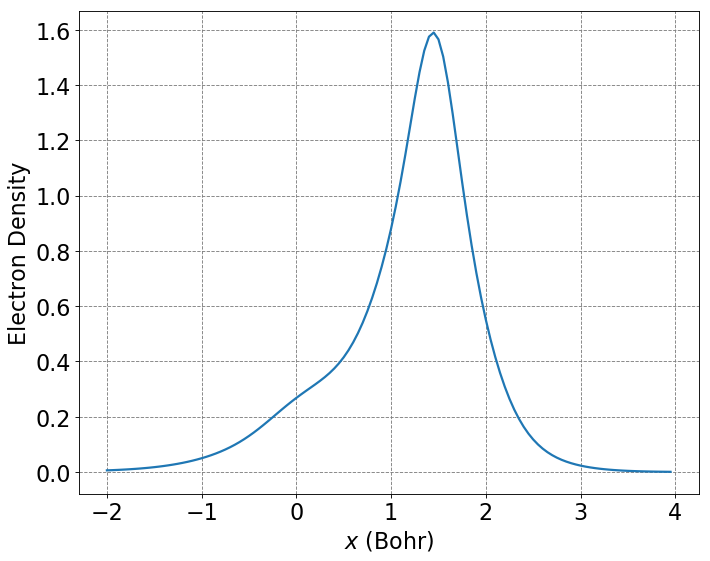

In [8]:
# plot electron density
x = np.arange(-2,4,0.05)
density = hf.compute_electron_density(basis_set,P,x)
ax = plt.define_figure(xlabel="$x$ (Bohr)",ylabel="Electron Density")
ax.plot(x,density,lw=2)